# Hacker News

In [201]:
# IMPORTS
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import datetime as dt



In [202]:
raw = pd.read_csv(r'HN_posts_year_to_Sep_26_2016.csv')

raw.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


remove posts without comments


In [203]:
raw.drop(raw.loc[raw['num_comments'] == 0].index, inplace=True)

In [204]:
raw.reset_index(inplace=True, drop=True)
raw.head()


,id,title,url,num_points,num_comments,author,created_at
0,12578975,Saving the Hassle of Shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,9/26/2016 3:13
1,12578908,Ask HN: What TLD do you use for local developm...,NaN,4,7,Sevrene,9/26/2016 2:53
2,12578822,Amazons Algorithms Dont Find You the Best Deals,https://www.technologyreview.com/s/602442/amaz...,1,1,yarapavan,9/26/2016 2:26
3,12578694,Emergency dose of epinephrine that does not co...,http://m.imgur.com/gallery/th6Ua,2,1,dredmorbius,9/26/2016 1:54
4,12578624,Phone Makers Could Cut Off Drivers. So Why Don...,http://www.nytimes.com/2016/09/25/technology/p...,4,1,danso,9/26/2016 1:37


Explore Data

- id: The unique identifier from Hacker News for the post
- title: The title of the post
- url: The URL that the posts links to, if it the post has a URL
- num_points: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
- num_comments: The number of comments that were made on the post
- author: The username of the person who submitted the post
- created_at: The date and time at which the post was submitted

In [205]:
raw.describe()

,id,num_points,num_comments
count,8.040100e+04,80401.000000,80401.000000
mean,1.131508e+07,48.388677,23.790264
std,6.951544e+05,104.517216,54.343983
min,1.017691e+07,1.000000,1.000000
25%,1.069970e+07,3.000000,1.000000
50%,1.128317e+07,9.000000,3.000000
75%,1.191912e+07,52.000000,20.000000
max,1.257898e+07,5771.000000,2531.000000


In [206]:
def get_cat(series: pd.Series, empty_flag: bool) -> str:
    """
    :param series: a pandas series of data (should be of one data type)
    :param empty_flag: a boolean to call out an empty column (containing all NaNs)
    :return: a string that is the 'category of the datatype'

    This function will take a given series and return a generalized category for the datatype.
    This is necessary for readability as df.dtypes will return ungrouped types (i.e. float64, int64)
    as well as return some options that do not provide much insight (i.e. object)
    """
    if empty_flag:  # Catch Empty Columns
        return 'Empty'
    elif pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif pd.api.types.is_bool_dtype(series):
        return 'Boolean'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_string_dtype(series):
        return 'Text'
    else:  # Catches all others for review
        return 'Unknown'


def col_categories(data: pd.DataFrame):
    """
    :param data: a pandas Dataframe consisting of columns of data you want to explore their categories
    :return: None
    Prints the column name and data type of each column in the dataframe
    """
    if data.dropna().empty:  # Catches Error
        raise ValueError('DataFrame Provided Contains is either empty or only contains NaNs')
        # sys.exit(1)
    for col in data.columns:  # For Each Column
        if data[col].dropna().empty:  # Catch Empty Columns
            empty = True  # Set Flag
        else:
            empty = False  # Set Flag
        count = data[col].nunique()
        perc_null = 100*data[col].isnull().sum()/len(data)
        print(col, ': ', get_cat(data[col], empty), os.linesep, ' -- #Unique: ', count, '-- %Null: ', perc_null)

In [207]:
col_categories(raw)


id :  Numerical 
  -- #Unique:  80401 -- %Null:  0.0
title :  Text 
  -- #Unique:  78137 -- %Null:  0.0
url :  Text 
  -- #Unique:  67755 -- %Null:  12.110545888732727
num_points :  Numerical 
  -- #Unique:  911 -- %Null:  0.0
num_comments :  Numerical 
  -- #Unique:  547 -- %Null:  0.0
author :  Text 
  -- #Unique:  26595 -- %Null:  0.0
created_at :  Text 
  -- #Unique:  74053 -- %Null:  0.0


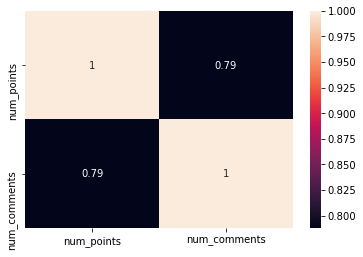

In [208]:
# Features to generate a visual
features = ['num_points', 'num_comments']
corr_matrix = raw[features].corr()
sns.heatmap(corr_matrix, annot=True)



We're specifically interested in posts whose titles begin with either Ask HN or Show HN.
Users submit Ask HN posts to ask the Hacker News community a specific question

users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting

Goal:
Do Ask HN or Show HN receive more comments on average?
Do posts created at a certain time receive more comments on average?


In [209]:
def p_type(row: pd.DataFrame) -> str:
    """
    a simple function to create a categorical variable based off if the post in question
    is a Ask_HN, Show_HN, or Other Post Types
    :param row: pd.DataFrame of length 1 (aka a row)
    :return: cat - a string containing the correct category
    """
    title = row.title.lower()
    if title.startswith('ask hn'):
        cat = 'ask'
    elif title.startswith('show hn'):
        cat = 'show'
    else:
        cat = 'other'
    return cat

In [210]:
raw['post_type'] = raw.apply(p_type, axis=1)
raw.head()


,id,title,url,num_points,num_comments,author,created_at,post_type
0,12578975,Saving the Hassle of Shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,9/26/2016 3:13,other
1,12578908,Ask HN: What TLD do you use for local developm...,NaN,4,7,Sevrene,9/26/2016 2:53,ask
2,12578822,Amazons Algorithms Dont Find You the Best Deals,https://www.technologyreview.com/s/602442/amaz...,1,1,yarapavan,9/26/2016 2:26,other
3,12578694,Emergency dose of epinephrine that does not co...,http://m.imgur.com/gallery/th6Ua,2,1,dredmorbius,9/26/2016 1:54,other
4,12578624,Phone Makers Could Cut Off Drivers. So Why Don...,http://www.nytimes.com/2016/09/25/technology/p...,4,1,danso,9/26/2016 1:37,other


review category

In [211]:
raw.post_type.value_counts()

other    68431
ask       6911
show      5059
Name: post_type, dtype: int64

now to look num_comments based on post category

In [212]:
raw.groupby('post_type').mean()


,id,num_points,num_comments
post_type,,,
ask,1.139844e+07,14.404572,13.744176
other,1.130769e+07,53.430039,25.838319
show,1.130112e+07,26.621269,9.810832


look at distributions now


Text(0.5, 1.0, 'Show Hacker Net')

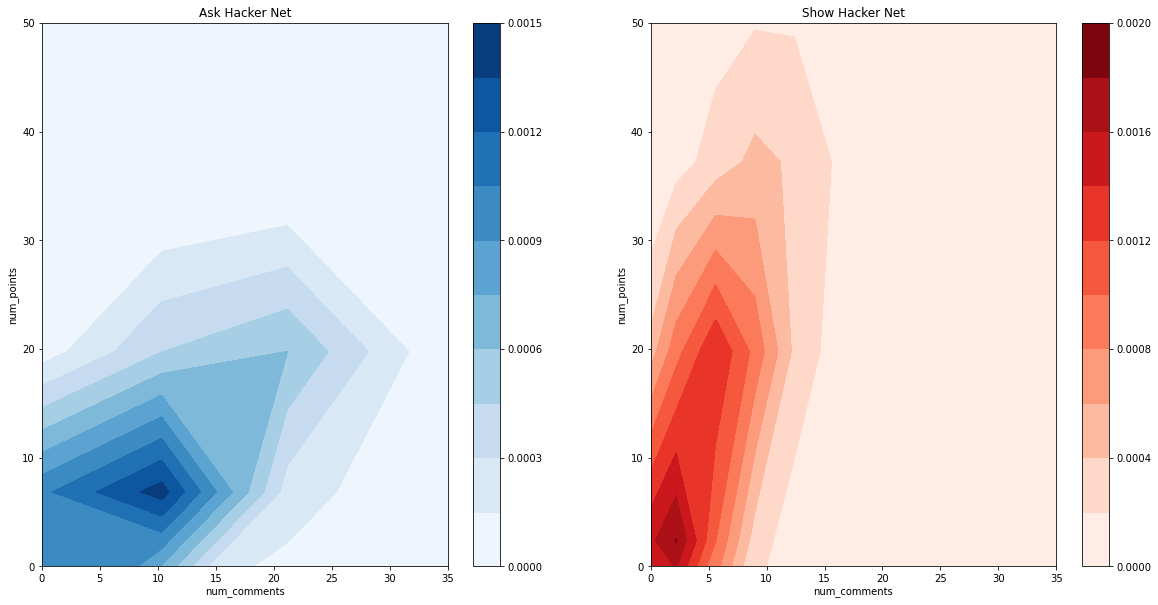

In [213]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

x1 = raw.num_comments.loc[raw['post_type'] == 'ask']
y1 = raw.num_points.loc[raw['post_type'] == 'ask']
x2 = raw.num_comments.loc[raw['post_type'] == 'show']
y2 = raw.num_points.loc[raw['post_type'] == 'show']


ax1 = sns.kdeplot(x1, y1, shade=True, cmap='Blues', cbar=True, ax=ax1)
ax2 = sns.kdeplot(x2, y2, shade=True, cmap='Reds', cbar=True, ax=ax2)

# Formating Plots
ax1.set_xlim(0, 35)
ax1.set_ylim(0, 50)
ax2.set_xlim(0, 35)
ax2.set_ylim(0, 50)
ax1.set_title('Ask Hacker Net')
ax2.set_title('Show Hacker Net')


Evaluate if specific times are better for accruing comments and/or points

In [228]:
def time_parse(row: pd.DataFrame):
    dat = dt.datetime.strptime(row[6], '%m/%d/%Y %H:%M')
    return int(dat.hour), dt.datetime.strftime(dat, '%A')


In [229]:
raw[['hour','DOW']] = raw.apply(time_parse, axis=1, result_type='expand')
raw.head()

,id,title,url,num_points,num_comments,author,created_at,post_type,hour,DOW
0,12578975,Saving the Hassle of Shopping,https://blog.menswr.com/2016/09/07/whats-new-w...,1,1,bdoux,9/26/2016 3:13,other,3,Monday
1,12578908,Ask HN: What TLD do you use for local developm...,NaN,4,7,Sevrene,9/26/2016 2:53,ask,2,Monday
2,12578822,Amazons Algorithms Dont Find You the Best Deals,https://www.technologyreview.com/s/602442/amaz...,1,1,yarapavan,9/26/2016 2:26,other,2,Monday
3,12578694,Emergency dose of epinephrine that does not co...,http://m.imgur.com/gallery/th6Ua,2,1,dredmorbius,9/26/2016 1:54,other,1,Monday
4,12578624,Phone Makers Could Cut Off Drivers. So Why Don...,http://www.nytimes.com/2016/09/25/technology/p...,4,1,danso,9/26/2016 1:37,other,1,Monday


Now we can look at comments & points by these new categories


In [242]:
raw.loc[raw.post_type == 'ask'].groupby(['hour']).mean().sort_values(by='num_comments', ascending=False)

,id,num_points,num_comments
hour,,,
15,1.139044e+07,29.312634,39.668094
13,1.146015e+07,23.769939,22.223926
12,1.150927e+07,16.529197,15.452555
10,1.148643e+07,16.707763,13.757991
17,1.140383e+07,16.962871,13.730198
2,1.129974e+07,12.634361,13.198238
14,1.144215e+07,13.682540,13.153439
4,1.131523e+07,13.704301,12.688172
8,1.154304e+07,13.810526,12.431579


In [243]:
raw.loc[raw.post_type == 'ask'].groupby('DOW').mean().sort_values(by='num_comments', ascending=False)

,id,num_points,num_comments,hour
DOW,,,,
Friday,1.142396e+07,16.403541,16.339236,13.089469
Sunday,1.134104e+07,19.009126,15.707953,13.177314
Monday,1.138489e+07,15.628159,15.587545,13.719314
Saturday,1.142378e+07,13.854494,12.683310,13.292439
Tuesday,1.141208e+07,10.953153,12.194595,13.048649
Thursday,1.138881e+07,12.172314,12.099710,13.064860
Wednesday,1.140619e+07,13.949062,11.804290,13.348525


In [244]:
raw.loc[raw.post_type == 'show'].groupby('hour').mean().sort_values(by='num_points', ascending=False)

,id,num_points,num_comments
hour,,,
12,1.132902e+07,33.566667,12.030000
11,1.138066e+07,31.565789,10.583333
23,1.122807e+07,30.398649,9.756757
19,1.128289e+07,29.800000,10.337037
6,1.141236e+07,29.378947,9.515789
14,1.131006e+07,28.531722,11.598187
13,1.128629e+07,28.511976,9.922156
18,1.128235e+07,28.408360,10.424437
0,1.129621e+07,27.645390,9.099291


In [245]:
raw.loc[raw.post_type == 'show'].groupby('DOW').mean().sort_values(by='num_points', ascending=False)

,id,num_points,num_comments,hour
DOW,,,,
Friday,1.130958e+07,28.977578,10.417040,13.248132
Monday,1.129868e+07,27.472941,10.024706,13.438824
Sunday,1.131540e+07,26.652720,8.571130,13.583682
Tuesday,1.129222e+07,26.336700,9.419753,13.363636
Thursday,1.131579e+07,26.180723,9.971084,13.590361
Wednesday,1.127797e+07,25.639418,10.230683,13.571109
Saturday,1.131455e+07,24.792411,9.466518,13.734375



Recap findings and make suggestion on how to post to get the most benefit by post type